In [1]:
#librairie
from lxml import etree
import lxml
import pandas as pd

#Fonction qui prend en entrée  un fichier et nous sort le dataframe des infos 
def parse_from_unicode(unicode_str):
    s = unicode_str.encode('utf-8')
    return etree.fromstring(s)

#fonction utile pour la fonction suivante
def extraction(xml_str):
    #liste où on gardera toutes les informations de l'article
    data_i=[]
    
    ###recupération des données annotées
    on_verra=parse_from_unicode(xml_str)
    attributs=on_verra.attrib.keys()
    for i in attributs:
        data_i.append(on_verra.attrib[i])

    ###extraction de l'article
    
    #si on voit une balise p on garde son emplacement
    liste_position_p=[]
    for i in range(len(xml_str)):
        #si une nouvelle paragraphe, on détecte son indice sur le texte
        if xml_str[i]=='p' and xml_str[i+1]=='>' :
            liste_position_p.append(i)
    #on enleve la premiere balise p qui correspond au titre qu'on a déjà identifié
    del liste_position_p[0]
    
    #on extrait le texte compris entre les balises p ouvrantes et fermantes p ouvrante +2 (>+Debut) à p fermantes -2 (<+/)
    text=''
    for i in range (0,len(liste_position_p), 2):
        text=text+xml_str[liste_position_p[i]+2:liste_position_p[i+1]-2]
    data_i.append(text)
    
    return data_i

#fonction à appeler pour avoir le dataframe avec les infos
def dataframe_fichier_annote(nom_fichier, encoding="utf-8", var_index=None):

    #Importation du fichier xml 
    f = open(nom_fichier, "r", encoding=encoding)
    xml_str = f.read()
    xml_str=xml_str.replace('&', '-')#sinon le parser a des probleme
    
    #on détecte les indices des <text et </text>
    indices_textes=[]
    for i in range(len(xml_str)):
        if xml_str[i:i+4]=='<tex' or xml_str[i:i+4]=='</te':
            indices_textes.append(i) 
    
    #on scinde le fichier en articles commençant par <text et se terminant par </text>
    articles=[]
    for i in range(0,len(indices_textes),2):
        articles.append(xml_str[indices_textes[i]:indices_textes[i+1]+7])
    
    #on crée le dataframe des infos si ce n'est déjà fait sinon on y ajoute les nouvelles infos
    debut_ecriture_data=False
    #on parcourt les articles, et pour chauqe article on extrait ses métadonnées ainsi que le texte de l'article qu'on met dans 
    #dataframe

    for xml_str in articles:
        if not debut_ecriture_data:
            data=pd.DataFrame(extraction(xml_str)).T
            debut_ecriture_data=True
        else:
            data=data.append(pd.DataFrame(extraction(xml_str)).T)
            
    #le dataframe final avec les noms de colones
    #on recupère les noms des attributs et on les mets comme noms de colonne
    attributs=parse_from_unicode(xml_str).attrib.keys()
    data.columns= attributs + ['article']
    
    if var_index!=None:
        data=data.set_index(var_index)
    return data

In [2]:
# Création du DataFrame sur le Grexit
data_grexit=dataframe_fichier_annote('presse-fra-grexit-utf8-xml.txt',var_index='id' )

#quelques mises en formes supplémentaire
data_grexit.year=pd.to_numeric(data_grexit.year)
data_grexit.vol=pd.to_numeric(data_grexit.vol)
data_grexit.date=pd.to_datetime(data_grexit.date)
data_grexit['sujet']='grexit'

#affichage du dataframe
data_grexit.head()

,sig,title,author,year,date,section,sourcename,sourcesig,vol,kwconcept,kwsubject,polarity,article,sujet
id,,,,,,,,,,,,,,
1,presse-fra-viewEvent-1-docRefId-0-docName-news...,La BCE avance sur le terrain des rachats d'act...,NULL,2015,2015-02-01,NULL,Les Echos,EC,1,élections législatives|montée du populisme|sig...,Inflation et rémunération,Négatif,La Banque centrale européenne continue de prép...,grexit
2,presse-fra-viewEvent-1-docRefId-0-docName-news...,"L'euro, atout stratégique pour les Baltes",CHRISTOPHE LUCET c.lucet@sudouest.fr,2015,2015-02-01,NULL,Sud Ouest - Toutes éditions,SO,1,atout stratégique|présidence semestrielle|outi...,Actualités|Relations internationales,Positif,Al'heure où l'Europe s'interroge sur son aveni...,grexit
3,presse-fra-viewEvent-1-docRefId-0-docName-news...,Berlin fait pression sur Athènes avant les éle...,NULL,2015,2015-05-01,NULL,Les Echos,EC,1,gouvernement allemand|ministère des Finances|o...,Relations internationales|Partis politiques|Cr...,Négatif,Trois semaines avant un scrutin décisif en Grè...,grexit
4,presse-fra-viewEvent-1-docRefId-0-docName-news...,grèce,Bruno Odent,2015,2015-05-01,NULL,l'Humanité,HU,1,spectre de la déflation|explosion des souffran...,Politique et gouvernement,Négatif,Merkel laisse « fuiter » qu'elle serait prête ...,grexit
5,presse-fra-viewEvent-1-docRefId-0-docName-news...,Grèce,NULL,2015,2015-05-01,NULL,Le Figaro,LF,1,NULL,Économie et gestion|Actualités,Neutre,Le débat sur le « grexit » relancé en Allemagn...,grexit


In [3]:
# Création du DataFrame sur le Brexit
data_brexit=dataframe_fichier_annote('presse-fra-brexit-utf8-xml.txt',var_index='id' )

#quelques mises en formes supplémentaire
data_brexit.year=pd.to_numeric(data_brexit.year)
data_brexit.vol=pd.to_numeric(data_brexit.vol)
data_brexit.date=pd.to_datetime(data_brexit.date)
data_brexit['sujet']='brexit'

#affichage du dataframe
data_brexit.head()

,sig,title,author,year,date,section,sourcename,sourcesig,vol,kwconcept,kwsubject,polarity,article,sujet
id,,,,,,,,,,,,,,
1,presse-fra-viewEvent-1-docRefId-0-docName-news...,Economie -amp; EntrepriseLe risque grec fait d...,NULL,2015,2015-07-01,NULL,Le Monde,LM,1,Coup de chaud|indices européens|perspective de...,NULL,Négatif,Et de trois. Après les turbulences de la mi-oc...,brexit
2,presse-fra-viewEvent-1-docRefId-0-docName-news...,David Cameron donne des gages aux eurosceptiqu...,Philippe Bernard,2015,2015-07-01,NULL,Le Monde,LM,1,élections législatives|droit de veto|Union eur...,Partis politiques|Santé et services sociaux,Positif,"Londres - correspondant - L'immigration, l'éco...",brexit
3,presse-fra-viewEvent-1-docRefId-0-docName-news...,Merkel calme le jeu avec Athènes et Londres,"Philippe Bernard, Frédéric Lemaître et Jean-Pi...",2015,2015-09-01,NULL,Le Monde,LM,1,chancelière allemande|Union européenne|princip...,Relations internationales,Positif,"Londres, Berlin, Bruxelles - correspondants - ...",brexit
4,presse-fra-viewEvent-1-docRefId-0-docName-news...,"2015, une année électorale qui va stresser les...",NULL,2015,2015-01-19,NULL,Les Echos,EC,1,risque politique|risque pour les marchés|agenc...,NULL,Négatif,"En 2014, le risque politique lié aux élections...",brexit
5,presse-fra-viewEvent-1-docRefId-0-docName-news...,La croissance britannique face au doute électoral,"Collomp, Florentin; florentin collomp @fcollom...",2015,2015-01-28,NULL,Le Figaro,LF,1,croissance britannique|doute électoral|positio...,Économie et gestion|Actualités,Positif,CONJONCTURE Poursuite d'une croissance vigoure...,brexit


In [5]:
# Création du DataFrame final
data_final=data_brexit.append(data_grexit)
data_final.head()

,sig,title,author,year,date,section,sourcename,sourcesig,vol,kwconcept,kwsubject,polarity,article,sujet
id,,,,,,,,,,,,,,
1,presse-fra-viewEvent-1-docRefId-0-docName-news...,Economie -amp; EntrepriseLe risque grec fait d...,NULL,2015,2015-07-01,NULL,Le Monde,LM,1,Coup de chaud|indices européens|perspective de...,NULL,Négatif,Et de trois. Après les turbulences de la mi-oc...,brexit
2,presse-fra-viewEvent-1-docRefId-0-docName-news...,David Cameron donne des gages aux eurosceptiqu...,Philippe Bernard,2015,2015-07-01,NULL,Le Monde,LM,1,élections législatives|droit de veto|Union eur...,Partis politiques|Santé et services sociaux,Positif,"Londres - correspondant - L'immigration, l'éco...",brexit
3,presse-fra-viewEvent-1-docRefId-0-docName-news...,Merkel calme le jeu avec Athènes et Londres,"Philippe Bernard, Frédéric Lemaître et Jean-Pi...",2015,2015-09-01,NULL,Le Monde,LM,1,chancelière allemande|Union européenne|princip...,Relations internationales,Positif,"Londres, Berlin, Bruxelles - correspondants - ...",brexit
4,presse-fra-viewEvent-1-docRefId-0-docName-news...,"2015, une année électorale qui va stresser les...",NULL,2015,2015-01-19,NULL,Les Echos,EC,1,risque politique|risque pour les marchés|agenc...,NULL,Négatif,"En 2014, le risque politique lié aux élections...",brexit
5,presse-fra-viewEvent-1-docRefId-0-docName-news...,La croissance britannique face au doute électoral,"Collomp, Florentin; florentin collomp @fcollom...",2015,2015-01-28,NULL,Le Figaro,LF,1,croissance britannique|doute électoral|positio...,Économie et gestion|Actualités,Positif,CONJONCTURE Poursuite d'une croissance vigoure...,brexit


In [ ]:
#Mettre dans un fichier csv les données
#data_final.to_csv("données bon.csv",index=True)

In [7]:
#Data Cleaning
data_g = data_grexit.loc[:, ['title', 'polarity', 'article']]
data_g.shape

(1185, 3)

In [11]:
data_g.drop(data_g.loc[data_g['polarity']=='Neutre'].index, inplace=True)
data_g.shape

(1170, 3)

In [13]:
data_g.head()

,title,polarity,article
id,,,
1,La BCE avance sur le terrain des rachats d'act...,Négatif,La Banque centrale européenne continue de prép...
2,"L'euro, atout stratégique pour les Baltes",Positif,Al'heure où l'Europe s'interroge sur son aveni...
3,Berlin fait pression sur Athènes avant les éle...,Négatif,Trois semaines avant un scrutin décisif en Grè...
4,grèce,Négatif,Merkel laisse « fuiter » qu'elle serait prête ...
6,Merkel serait prête à laisser la Grèce sortir ...,Négatif,ZONE EURO La Grèce ne pourra pas rester dans l...


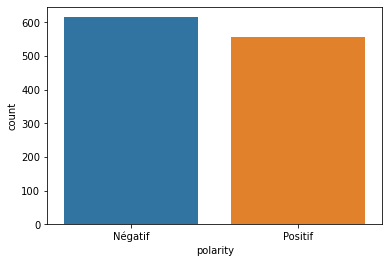

In [15]:
#Affichage de la répartition des articles positifs et négatifs de notre dataset.#

import seaborn as sns

sns.countplot(x='polarity', data=data_g)

In [23]:
#Data Preprocessing
import re

def preprocess_text(sentence):

    # Remove punctuations and numbers
    sentence = re.sub(r'[^\w\s]', ' ', sentence)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

In [24]:
X = []
sentences = list(data_g['article'])
for sen in sentences:
    X.append(preprocess_text(sen))

In [37]:
X[1]

'Al heure où Europe interroge sur son avenir entrée de la Lituanie dans la zone euro et arrivée de sa voisine la Lettonie à la présidence semestrielle de Union sont tout sauf anecdotiques Bien sûr les trois pays Baltes on oublie pas Estonie serrés au fond de la Baltique entre le colosse russe la Pologne et la Scandinavie ont pas souvent occasion de faire la une Pourtant ces petites républiques mènent leur barque avec ténacité depuis leur adhésion à Union européenne et à Otan en 2004 et leur parcours est de nature à intéresser et encourager ceux de leurs partenaires qui rencontrent des difficultés À Tallinn depuis trois ans et à Riga depuis an dernier euro circule déjà et le changement de devise qui coïncide avec une solide croissance eu des effets positifs sur économie incitant Vilnius à suivre le mouvement sans oublier plus tard une probable adhésion de la Pologne Les Baltes voient dans la monnaie unique un atout économique mais plus encore car euro a ses détracteurs tout comme chez n

In [38]:
#On applique la fonction dans notre DataFrame
data_g['article'] = data_g['article'].apply(preprocess_text)
data_g.head()

,title,polarity,article
id,,,
1,La BCE avance sur le terrain des rachats d'act...,Négatif,La Banque centrale européenne continue de prép...
2,"L'euro, atout stratégique pour les Baltes",Positif,Al heure où Europe interroge sur son avenir en...
3,Berlin fait pression sur Athènes avant les éle...,Négatif,Trois semaines avant un scrutin décisif en Grè...
4,grèce,Négatif,Merkel laisse fuiter qu elle serait prête à me...
6,Merkel serait prête à laisser la Grèce sortir ...,Négatif,ZONE EURO La Grèce ne pourra pas rester dans l...


In [48]:
import numpy as np

#Convertir notre variable à prédire en binaire

y = data_g['polarity']

y = np.array(list(map(lambda x: 1 if x=="Positif" else 0, y)))

def nb_polarity(string):
    x=0
    if string=="Positif":
        x=1
    else:
        x=0
    return x
    
    
#L'effectuer dans le DataFrame...
#data_g_dummies = pd.get_dummies(data_g, columns=["polarity"])
#data_g_dummies.head()

#OU :

data_g['polarity'] = data_g['polarity'].apply(nb_polarity)
data_g.head()

,title,polarity,article
id,,,
1,La BCE avance sur le terrain des rachats d'act...,0,La Banque centrale européenne continue de prép...
2,"L'euro, atout stratégique pour les Baltes",1,Al heure où Europe interroge sur son avenir en...
3,Berlin fait pression sur Athènes avant les éle...,0,Trois semaines avant un scrutin décisif en Grè...
4,grèce,0,Merkel laisse fuiter qu elle serait prête à me...
6,Merkel serait prête à laisser la Grèce sortir ...,0,ZONE EURO La Grèce ne pourra pas rester dans l...


In [1]:
import numpy as np
import re
import nltk
from nltk.corpus import stopwords

from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten
from keras.layers import GlobalMaxPooling1D
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer

ImportError: Keras requires TensorFlow 2.2 or higher. Install TensorFlow via `pip install tensorflow`

MACHINE LEARNING

In [54]:
from sklearn.model_selection import train_test_split

X=data_g['article']
Y=data_g['polarity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [53]:
pip install --upgrade tensorflow-gpu